In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import math
import quandl

sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

In [3]:
ticker = ['BOVA11.SA', 'CIEL3.SA', 'MGLU3.SA', 'ITUB3.SA', 'BBDC3.SA', 'LREN3.SA', 'UGPA3.SA', 'PETR3.SA', 'B3SA3.SA', 'MDIA3.SA', 'WEGE3.SA', 'ABEV3.SA']
#ticker = ["BOVA11","ABEV3","AZUL4","BTOW3","B3SA3","BBAS3","BBSE3","BRML3","BBDC3","BBDC4","BRAP4","BRKM5","BRFS3","BPAC11","CRFB3","CCRO3","CMIG4","HGTX3","CIEL3","COGN3","CSAN3","CPFE3","CVCB3","CYRE3","ECOR3","ELET3","ELET6","EMBR3","ENBR3","EGIE3","EQTL3","YDUQ3","FLRY3","GOAU4","GGBR4","GOLL4","HAPV3","HYPE3","IGTA3","GNDI3","IRBR3","ITUB4","ITSA4","JBSS3","KLBN11","RENT3","LAME4","LREN3","MGLU3","MRFG3","BEEF3","MRVE3","MULT3","NTCO3","BRDT3","PETR3","PETR4","QUAL3","RADL3","RAIL3","SBSP3","SANB11","CSNA3","SULA11","SUZB3","TAEE11","TOTS3","USIM5","VALE3","WEGE3"]
#ticker = list(map(lambda tic: tic+".SA", ticker))
dados_acoes = wb.DataReader(ticker, data_source='yahoo', start='2018-1-1')['Adj Close']
dados_acoes.head()
dados_acoes.to_csv("dados_acoes.csv")

C:\Users\Vien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BOVA11.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


KeyboardInterrupt: 

In [3]:
ticker_cripto = ["BTC-USD", "ETH-USD", "BNB-USD", 'ADA-USD', 'DOGE-USD', 'XRP-USD', 'BCH-USD', 'LTC-USD', 'LINK-USD', 'ETC-USD', 'XLM-USD', 'VET-USD', 'FIL-USD', 'TRX-USD', 'XMR-USD']
dados_cripto = wb.DataReader(ticker_cripto, data_source='yahoo', start='2018-1-1')['Adj Close']
dados_cripto.head()
dados_cripto.to_csv("dados_cripto.csv")

C:\Users\Vien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BTC-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Vien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ETH-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


KeyboardInterrupt: 

In [4]:
dados = dados_acoes.join(dados_cripto).dropna()
dados.head()

Symbols,BOVA11.SA,CIEL3.SA,MGLU3.SA,ITUB3.SA,BBDC3.SA,LREN3.SA,UGPA3.SA,PETR3.SA,B3SA3.SA,MDIA3.SA,WEGE3.SA,ABEV3.SA,BTC-USD,ETH-USD,BNB-USD,ADA-USD,DOGE-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,
2019-01-02,87.900002,8.763200,5.645670,28.822842,22.536489,37.888344,25.573843,24.403349,8.481046,43.918602,8.731884,15.258595,3943.409424,155.047684,6.188613,0.045258,0.002407,0.375243
2019-01-03,88.000000,8.553904,5.585264,29.084379,23.007507,37.409847,25.098511,24.906979,8.850316,45.071270,8.930999,15.428659,3836.741211,149.135010,5.903535,0.042682,0.002360,0.360224
2019-01-04,88.500000,9.236394,5.415277,28.597385,22.503233,35.974354,24.929083,25.190847,8.529873,45.022427,9.032983,15.636516,3857.717529,154.581940,6.065138,0.043812,0.002315,0.356747
2019-01-07,88.480003,9.154496,5.499360,28.967138,22.692335,35.147854,24.166668,26.005819,8.484097,45.520618,8.892147,15.570379,4025.248291,151.699219,6.291411,0.047996,0.002285,0.364347
2019-01-08,88.830002,8.845098,5.455042,29.039284,22.944477,36.278854,23.766638,25.868464,8.508512,45.276405,8.819300,15.258595,4030.847900,150.359634,6.640054,0.048525,0.002276,0.365315


In [5]:
retornos_acoes = dados_acoes.pct_change()
retornos_cripto = dados_cripto.dropna().pct_change()

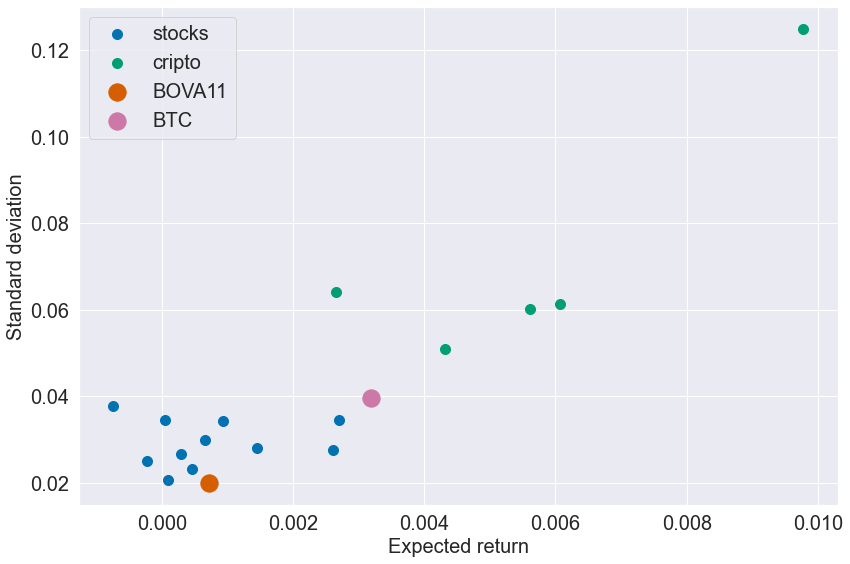

In [6]:
plt.scatter(retornos_acoes.mean(), retornos_acoes.std(), s=100)
plt.scatter(retornos_cripto.mean(), retornos_cripto.std(), s=100)
plt.scatter(retornos_acoes.mean()['BOVA11.SA'], retornos_acoes.std()['BOVA11.SA'], s=300)
plt.scatter(retornos_cripto.mean()['BTC-USD'], retornos_cripto.std()['BTC-USD'], s=300)
plt.xlabel("Expected return")
plt.ylabel("Standard deviation")
plt.legend(["stocks", "cripto", "BOVA11", "BTC"])
plt.tight_layout()

In [7]:
N = 252 # 252 trading days in a year
rf = 0.025 # 3.75% risk free rate

In [8]:
def sharpe_ratio(data, N, rf):
    returns = data.pct_change().dropna()
    mean = returns.mean() - (math.pow(1+rf, 1/252)-1)
    sigma = returns.std()
    return mean / sigma

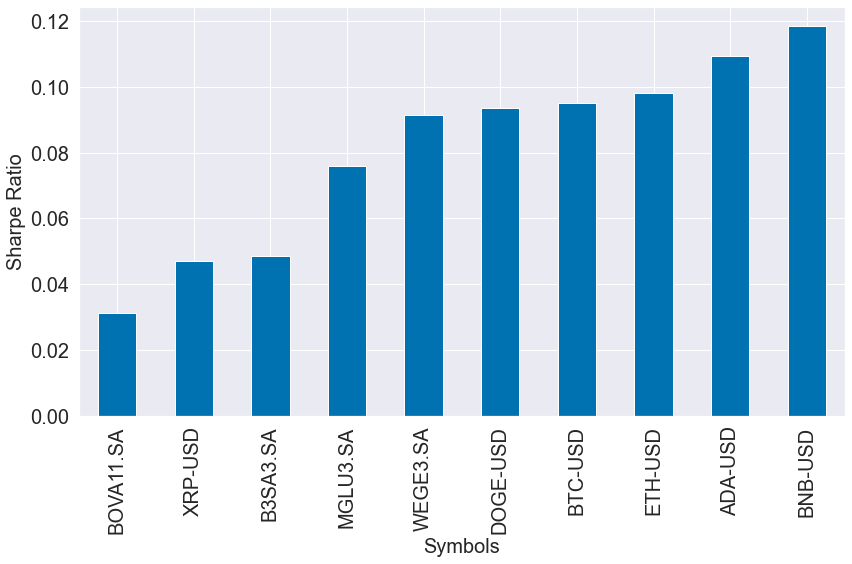

In [9]:
sharpes = dados.apply(sharpe_ratio, args = (N, rf, ), axis = 0)
sharpes.sort_values()[-10:].plot.bar()
plt.ylabel('Sharpe Ratio')
plt.tight_layout()

C:\Users\Vien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Vien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BTC-USD', ylabel='Density'>

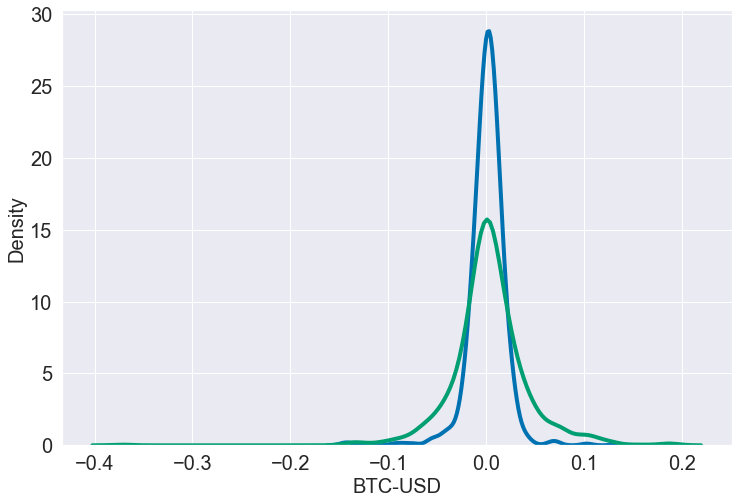

In [43]:
sns.distplot(retornos_acoes['BOVA11.SA'], hist=False)
sns.distplot(retornos_cripto['BTC-USD'], hist=False)

<AxesSubplot:xlabel='BTC-USD', ylabel='Probability'>

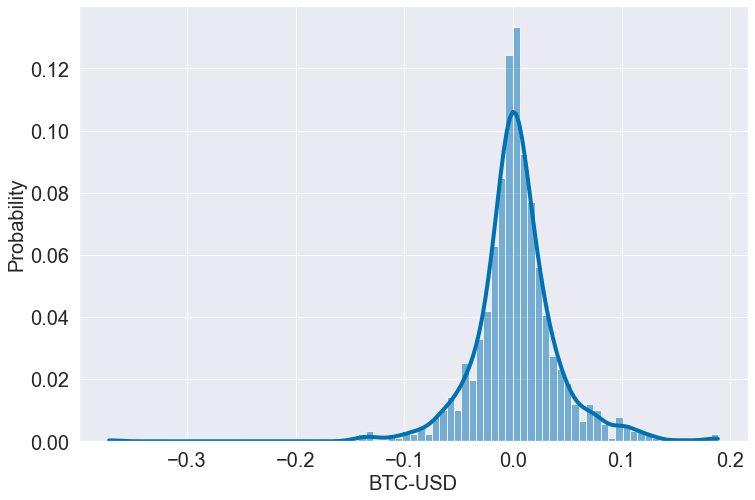